## Made by Shubham Sharma

## Dimensionality Reduction techniques on symmetry functions.

In [1]:
#Importing all the modules

import os
import time

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(threshold=100000)
%matplotlib inline

## Cleaned symmetry function file along with energy

In [2]:
#Please change these directories path

SFP = 'function.cleaned.data'

ENG = 'energy.data'

# os.chdir('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/nnp-select/FPS/nnp-scaling_for_FPS/before_pruning/')

# os.mkdir('plots')
os.chdir('/plots')

In [4]:
#Loading SF file as a numpy array

se = np.loadtxt(SFP, usecols = range(1,43)) #Please varify the number of columns in SF file
print(se.shape)

(5924592, 42)


In [5]:
print(f'Initial shape of function.data: {se.shape}')
se = se.reshape((-1,144*42)) #Squeezing the SF of a single frame to make a feature vector

print(f'Shape of the feature vector: {se.shape}')
print(f'No. of frames: {se.shape[0]}\tNo. of features: {se.shape[1]}')

# print(se[1,42])

Initial shape of function.data: (5924592, 42)
Shape of the feature vector: (41143, 6048)
No. of frames: 41143	No. of features: 6048


In [6]:
en = np.loadtxt(ENG) #Loading file consisting total potential energy of each frame

assert se.shape[0] == en.shape[0]
print('Number of frames matches\nPlease go ahead')

Number of frames matches
Please go ahead


In [7]:
#Relative energy column

print(f'Minimum energy: {min(en)} eV')
R_en = en - min(en)

Minimum energy: -83936.0486813132 eV


In [8]:
#Stacking SF with corresponding energies

SF_dataset = np.column_stack((se, en))
print(f'Symmetry function dataset: {SF_dataset.shape}')

Symmetry function dataset: (41143, 6049)


## Histogram of the energy distribution

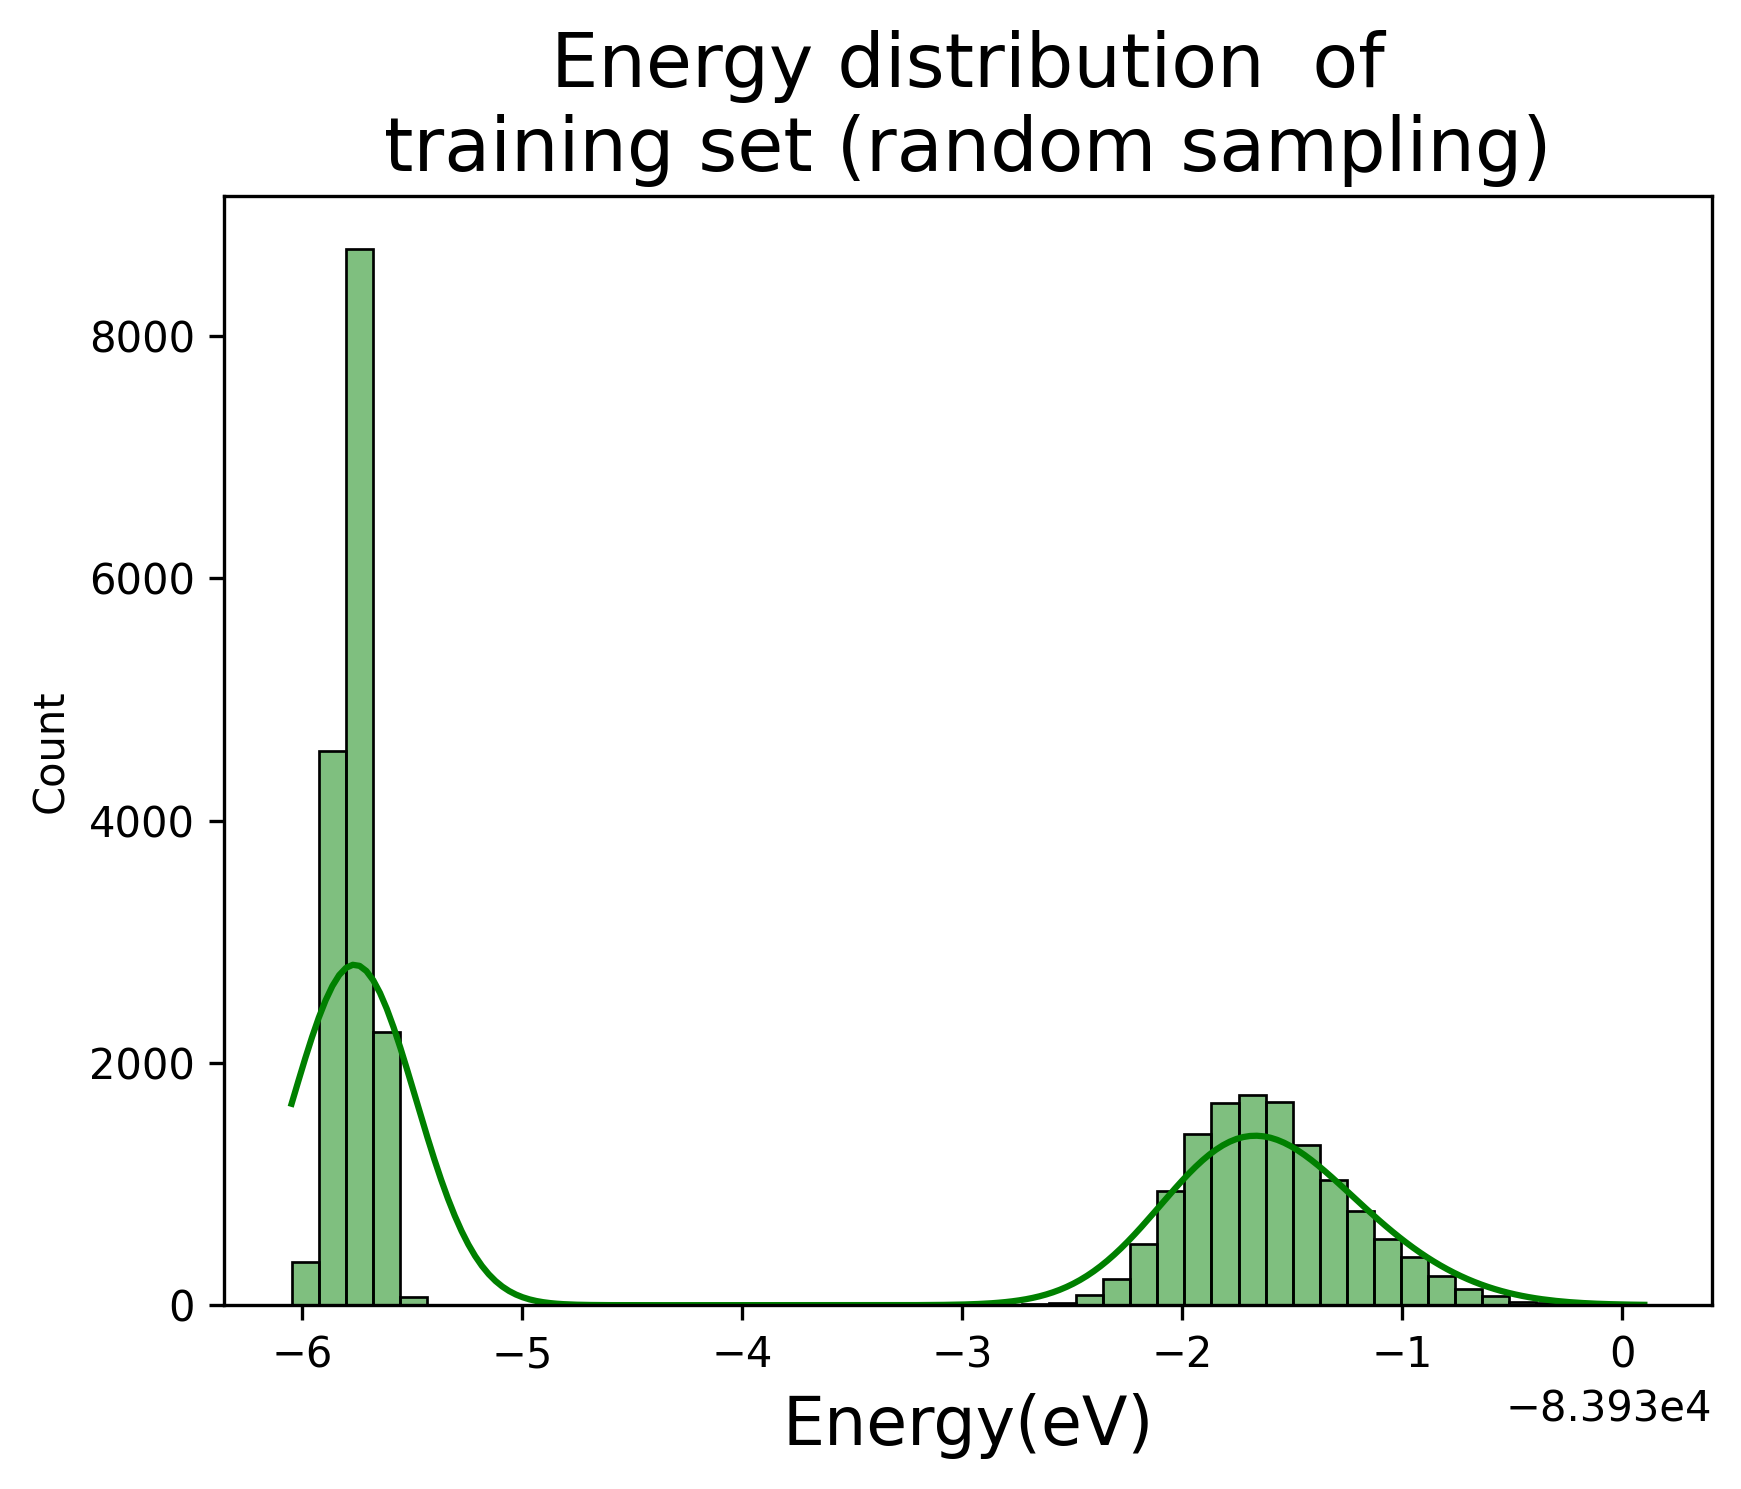

In [40]:
random_en = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/nnp-select/random/energy_random.data')

plt.figure(dpi = 300)
sns.histplot(random_en, color = 'green', kde = True, bins= 50)
# plt.hist(en, color = 'g', bins = 50)

plt.title('Energy distribution  of\ntraining set (random sampling)', fontsize = 18)
plt.xlabel('Energy(eV)', fontsize = 16)

#plt.savefig('en_hist_random.jpg', dpi = 300)

plt.show()

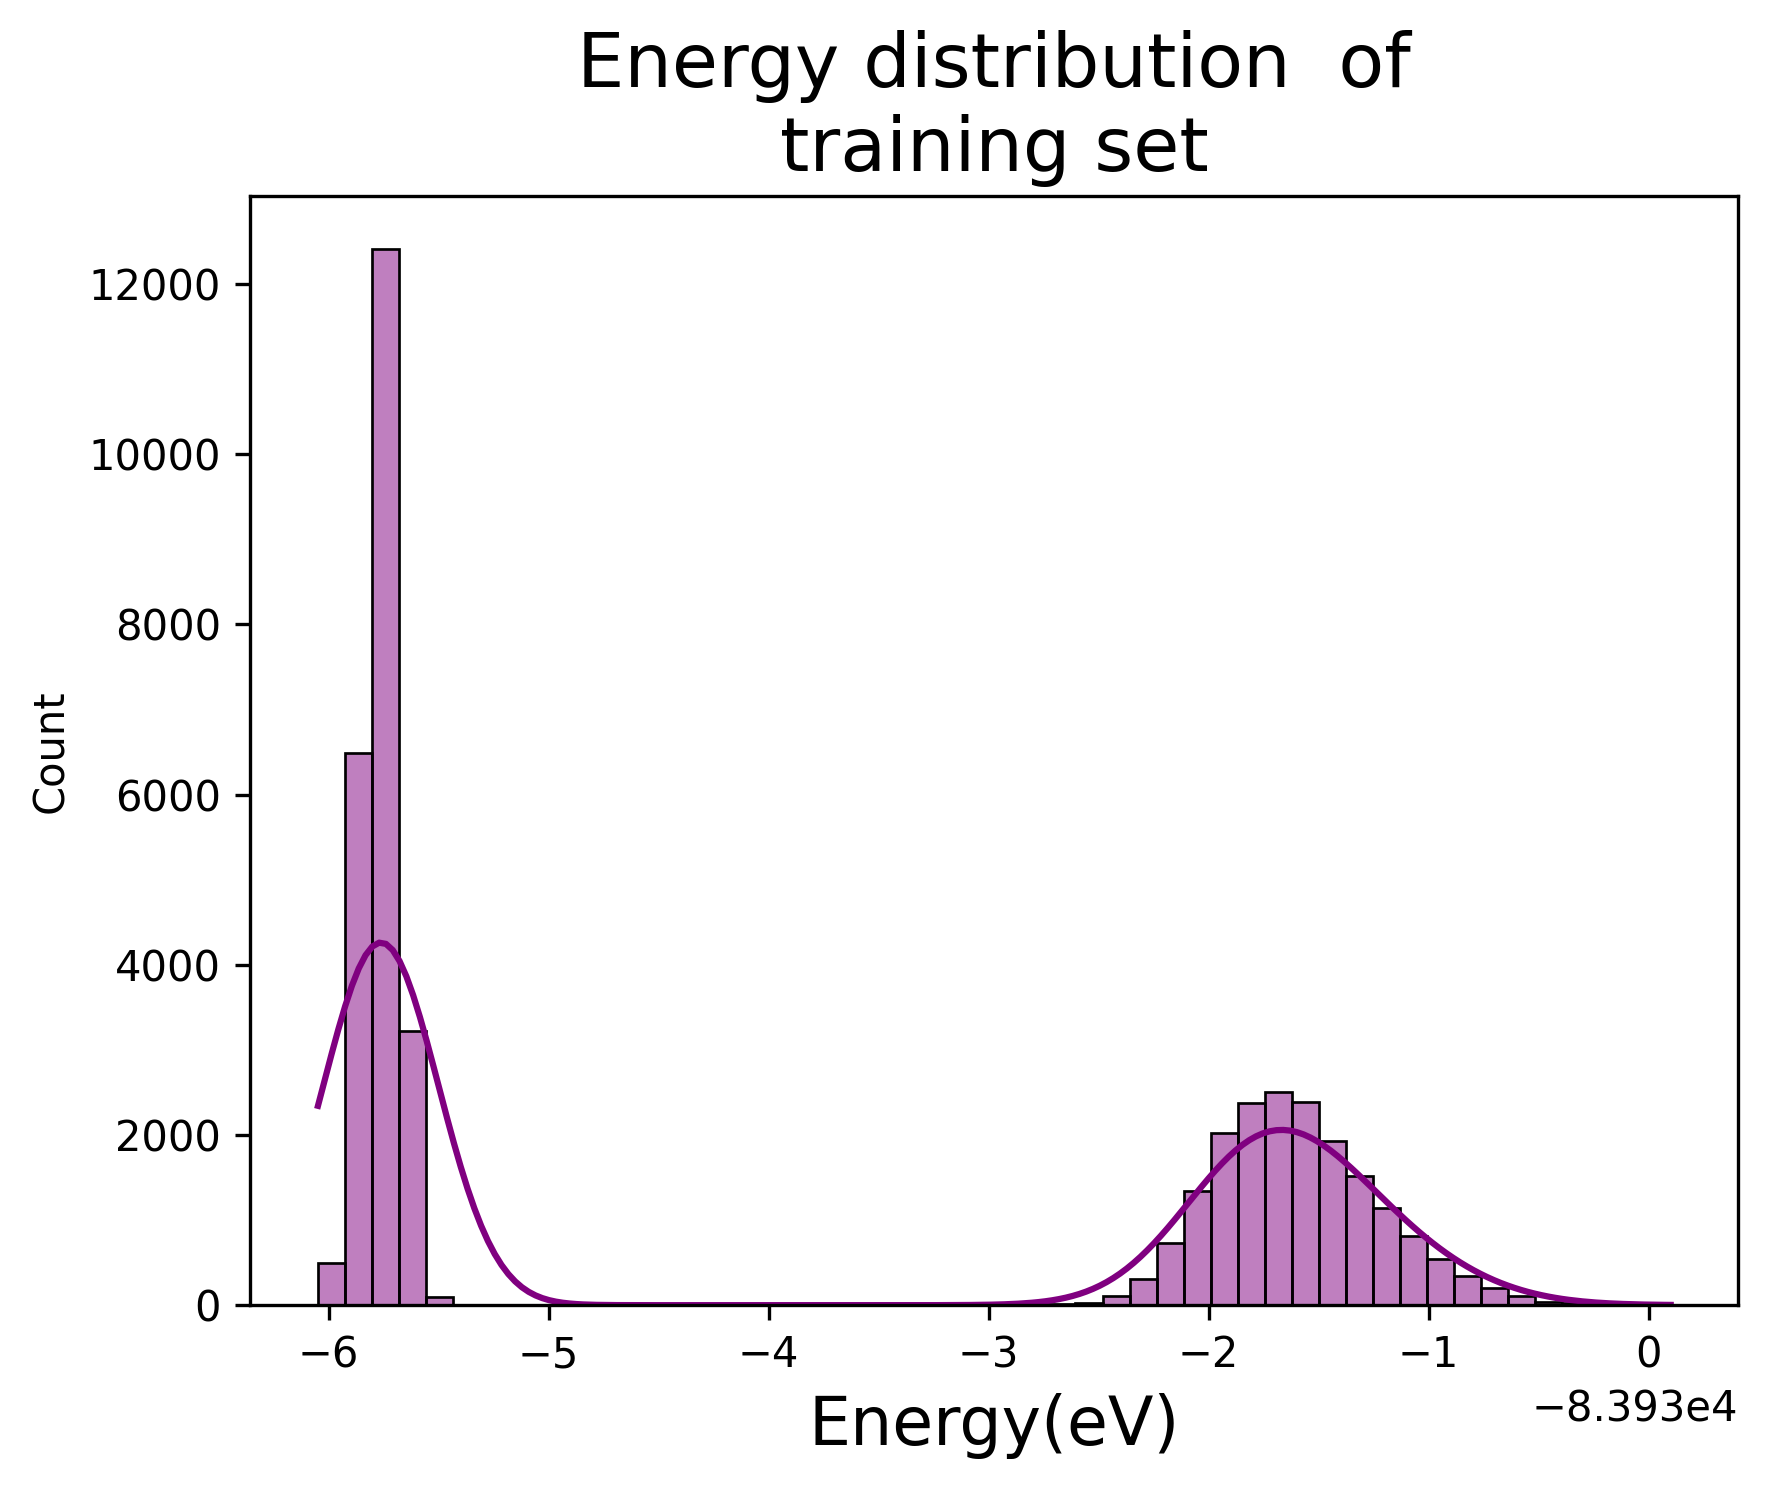

In [32]:
plt.figure(dpi = 300)
sns.histplot(en, color = 'purple', kde = True, bins= 50)
# plt.hist(en, color = 'g', bins = 50)

plt.title('Energy distribution  of\ntraining set', fontsize = 18)
plt.xlabel('Energy(eV)', fontsize = 16)

# plt.savefig('en_hist.jpg', dpi = 300)

plt.show()



In [9]:
# #Comparing the energy distribution

# temp_295K_en = np.loadtxt('/home/sharmas/mydrive/SabIA/HDNNP/Naphthalene/nnp-dataset/295K/energy.data.295K')
# temp_80K_en = np.loadtxt('/home/sharmas/mydrive/SabIA/HDNNP/Naphthalene/nnp-dataset/80K/energy.data.80K')

# plt.figure(figsize= (10, 8), dpi = 300)
# plt.subplot(1, 2, 1)
# sns.histplot(temp_80K_en, color= 'pink', kde = True, label = '80K')
# plt.legend()
# plt.subplot(1, 2, 2)
# sns.histplot(temp_295K_en, color= 'orange', kde = True, label = '295K')
# plt.legend()

# # plt.savefig('relative-energy-Naphthalene.jpg', dpi = 600)
# plt.show()

In [10]:
# from sklearn.manifold import TSNE

# proj = TSNE(n_components=2, perplexity=100.0, n_iter=500).fit_transform(se)
# proj.shape

## Lets do Principal Component Analysis 

In [51]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components= 2)
y_sklearn = sklearn_pca.fit_transform(Xr)

print(y_sklearn.shape)

# print(y_sklearn)

(10000, 2)


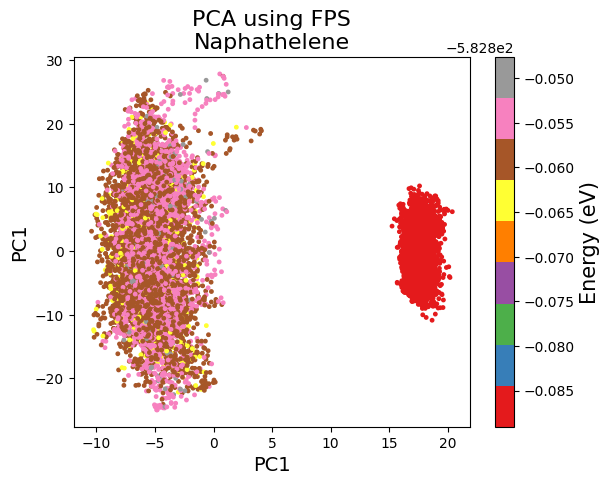

In [52]:
plt.scatter(y_sklearn[:, 0], y_sklearn[:, 1], s = 6, c = av_en_of_frames, cmap = 'Set1')
cbar = plt.colorbar()
cbar.set_label("Energy (eV)", fontsize = 15)
plt.title('PCA using FPS\nNaphathelene', fontsize = 16)
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC1', fontsize = 14)

#plt.savefig('PCA_FPS_naph_pick-295K.jpg', dpi = 300,)

plt.show()

In [13]:
# sklearn_pca.explained_variance_ratio_

## Lets do PCA manually
To understand how much variance the two eigen values explain

In [48]:
# from sklearn.preprocessing import StandardScaler

# scaled_se = StandardScaler().fit_transform(se)

# print(np.mean(scaled_se)) #Scaled the mean to 0 
# print(np.std(scaled_se)) #Scaled the standard deviation to 1

-9.579920631025859e-17
1.0000000000000013


In [15]:
# #Making the covariance matrix 

# cov_mat = 1/(scaled_se.shape[0]-1)*((scaled_se - np.mean(scaled_se, axis= 0)).T.dot((scaled_se - np.mean(scaled_se, axis= 0))))

In [16]:
# #Calculating eigen value and eigen vectors

# eig_vals, eig_vects = np.linalg.eig(cov_mat)

# # print(eig_vals)

In [17]:
# #Computing the principle components

# eig_pairs = []

# for i in range(len(eig_vals)):
#     eig_pairs.append((np.abs(eig_vals[i]), eig_vects[:, i]))
    
# eig_pairs.sort(key = lambda x: x[0], reverse = True)

# print(eig_pairs[1][1].shape)

In [18]:
# #Visualizing the variance explained using the principal components

# eig_val_per = sorted(100 * eig_vals/np.sum(eig_vals), reverse= True)
# # eig_val_per

In [19]:
# plt.figure(figsize=(10, 8))
# plt.title('Principal Component Analysis for Napthalene\n(less datapoints)\n14-Oct-2022')
# plt.subplot(1, 2, 1)
# plt.scatter(range(len(eig_val_per)), np.cumsum(eig_val_per), c = 'r', marker= 'o')
# plt.plot(range(len(eig_val_per)), np.ones(len(eig_val_per)) * 90, c ='b', label = '90%')
# plt.xlim(0, 200)
# plt.xlabel('Number of Principal Components', fontsize = 16)
# plt.ylabel('% of Variance explained', fontsize = 16)
# plt.legend(fontsize = 14)


# plt.subplot(1,2, 2)
# plt.scatter(range(len(eig_val_per)), np.cumsum(eig_val_per), c = 'r', marker= 'o')
# plt.plot(range(len(eig_val_per)), np.ones(len(eig_val_per)) * 90, c ='b', label = '90%')
# #plt.xlim(0, 200)
# plt.xlabel('Number of Principal Components', fontsize = 16)
# plt.ylabel('% of Variance explained', fontsize = 16)
# plt.legend(fontsize = 14)


# # plt.savefig('Variance_explained_with_PC.jpg', dpi = 300, layout = 'tight')
# plt.show()

## Lets try tSNE

In [74]:
from sklearn.manifold import TSNE

proj = TSNE(n_components=2, perplexity= 300, n_iter=1000).fit_transform(Xr)

/Users/shubhamdongriyal/opt/miniconda3/envs/pytorch_m1/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/shubhamdongriyal/opt/miniconda3/envs/pytorch_m1/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [50]:
plt.scatter(proj[:, 0], proj[:, 1], s = 6, c = av_en_of_frames, cmap = 'Set1', label = 'Perplexity = 300')
cbar = plt.colorbar()
cbar.set_label("Energy (eV)", fontsize = 15)
plt.title('t-SNE using FPS\nNaphthalene', fontsize = 16)
plt.xlabel('Feature-1', fontsize = 14)
plt.ylabel('Feature-2', fontsize = 14)
plt.legend()
# plt.savefig('tSNE_PCA_naph_pick-295K.jpg', dpi = 300, layout = 'tight')

plt.show()

NameError: name 'proj' is not defined

In [22]:
# #Plotting for the change in perpexlity for 250 iterations.

# plt.figure(figsize= (35, 30))
# plt.subplots_adjust(hspace=0.2)
# # plt.subplots_adjust(vspace=0.2)
# j=1
# for i in range(5, 105, 5):
#     proj = TSNE(n_components=2, perplexity= i, n_iter=250).fit_transform(se)
    
#     plt.subplot(5, 4, j)
#     j+=1
#     plt.scatter(proj[:, 0], proj[:, 1], s = 6, c = en, cmap = 'Dark2')
#     cbar = plt.colorbar()
#     cbar.set_label("Energy (eV)", fontsize = 15)
#     plt.title(f'perplexity = {i}', fontsize = 16)
#     plt.xlabel('reduced feature 1', fontsize = 14)
#     plt.ylabel('reduced feature 2', fontsize = 14)
# # plt.savefig('perp.jpg', layout = 'tight',dpi = 400)
# plt.show()

In [23]:
# #Plotting for the change in iterations at perplexity = 10

# plt.figure(figsize= (35, 30))
# plt.subplots_adjust(hspace=0.2)
# # plt.subplots_adjust(vspace=0.2)
# j=1
# for i in range(250, 2000, 250):
#     proj = TSNE(n_components=2, perplexity= 10, n_iter=i).fit_transform(se)
    
#     plt.subplot(2, 4, j)
#     j+=1
#     plt.scatter(proj[:, 0], proj[:, 1], s = 6, c = en, cmap = 'Dark2')
#     cbar = plt.colorbar()
#     cbar.set_label("Energy (eV)", fontsize = 15)
#     plt.title(f'Iterations = {i}', fontsize = 16)
#     plt.xlabel('reduced feature 1', fontsize = 14)
#     plt.ylabel('reduced feature 2', fontsize = 14)
# # plt.savefig('perp.jpg', layout = 'tight',dpi = 400)
# plt.show()


## Lets Try Multidimensional Scaling

In [ ]:
from sklearn.manifold import MDS

#Metric version of MDS

sklearn_MDS = MDS(n_components= 2, metric= False, n_init= 4, max_iter= 300)

y_MDS = sklearn_MDS.fit_transform(Xr)

: 

: 

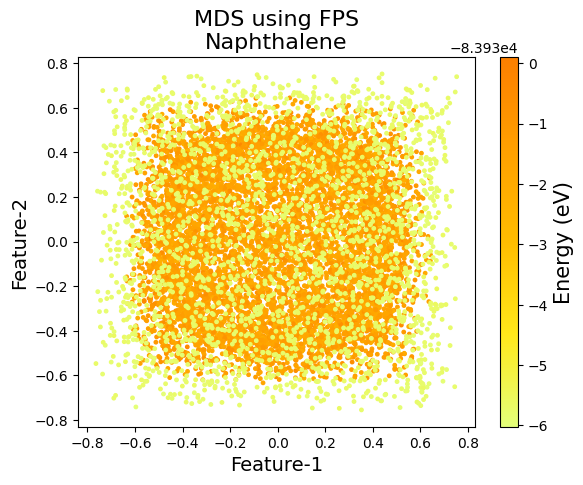

In [ ]:
plt.scatter(y_MDS[:, 0], y_MDS[:, 1], s = 6, c = en, cmap = 'Wistia')
cbar = plt.colorbar()
cbar.set_label("Energy (eV)", fontsize = 15)
plt.title('MDS using FPS\nNaphthalene', fontsize = 16)
plt.xlabel('Feature-1', fontsize = 14)
plt.ylabel('Feature-2', fontsize = 14)

#plt.savefig('MDS_FPS_naph_pick-295K.jpg', dpi = 300)

plt.show()

In [26]:
# from sklearn.manifold import MDS

# #Non - Metric version of MDS

# sklearn_MDS = MDS(n_components= 2, metric= False, n_init= 4, max_iter= 300)

# y_MDS = sklearn_MDS.fit_transform(se)

In [27]:
# plt.scatter(y_MDS[:, 0], y_MDS[:, 1], s = 6, c = en, cmap = 'Dark2')
# cbar = plt.colorbar()
# cbar.set_label("Energy (eV)", fontsize = 15)
# plt.title('MDS Naph', fontsize = 16)
# plt.xlabel('reduced feature 1', fontsize = 14)
# plt.ylabel('reduced feature 2', fontsize = 14)

# # plt.savefig('MDS-Naph.jpg', dpi = 300, layout = 'tight')

# plt.show()

## Farthest Point Sampling

In [9]:
from skcosmo.sample_selection import FPS

In [53]:
#change n_to_select to select the number of frames

selector = FPS(
n_to_select = 100,
progress_bar = True,
score_threshold = 1E-12,
full = False,
initialize = 'random')

selector.fit(se)

Xr = selector.transform(se)
idx = np.array(selector.get_support(indices = True))

  0%|          | 0/99 [00:00<?, ?it/s]

In [54]:
print(idx)

[  139   468   649   732  1057  1205  1452  1520  1644  1750  1863  1955
  2078  2112  2183  2296  2377  2479  2563  2613  2732  2885  3020  3113
  3186  3276  3567  5755  5863  5935  6173  6262  6306  6628  7011  7172
  7229  7429  7577  7633  7832  7939  8183  8385  8430  8463  8794  8892
  9002  9236  9365  9442  9512  9545  9703  9839 10093 10269 10568 10760
 10853 11307 12368 12683 12932 13141 13300 13587 13676 13812 13932 14218
 14260 14339 14395 14511 14633 14743 14784 14878 14925 14961 15009 15050
 15197 15255 16876 17308 17415 17562 17645 17944 18044 18150 18208 18286
 18343 18404 27397 32443]


In [11]:
print(f' Input shape: {se.shape}\tOutput shape: {Xr.shape}')

 Input shape: (41143, 6048)	Output shape: (10000, 6048)


## Verifing the selection criteria 

In [12]:
print(selector.get_select_distance().shape)

#print(selector.get_select_distance())

hass  = dict((idx, hauss) for idx, hauss in enumerate(selector.score(se)))

#sorting the dictionary

sort_hass = dict(sorted(hass.items(), key = lambda item: item[1], reverse= False))

# print(sort_hass)
# selector.score(se).shape

(10000,)


In [13]:
#TO TEST FOR THE SELECTION CRITERIA

# dummy = np.array([np.where(np.all(se == Xr[i], axis= 1))[0][0] for i in range(20)]).ravel()
# print(dummy)
# print(dummy.dtype)

In [14]:
#Stupid way to find the indexes

# idx = np.array([np.where(np.all(se == Xr[i], axis = 1))[0][0] for i in range(int(Xr.shape[0]))]).ravel() #Sometimes the idx contain two values in a array this is because the distance values are same So, I have selected the first one
#print(idx)

In [15]:
post_se = Xr.reshape(10000 * 144, 42)
# post_se2 = Xr.reshape(-1, 144, 42)

In [16]:
post_se.shape

(1440000, 42)

In [17]:
#np.savetxt('new_function.data', post_se, fmt = '%14.10f', newline='\n')

In [18]:
atomic_nu = np.loadtxt(SFP, usecols = 0, max_rows= 144)

In [19]:
new_dataset = np.column_stack((np.tile(atomic_nu, (10000,)), post_se))
new_dataset.dtype

dtype('float64')

In [24]:
np.savetxt('new_function.data', new_dataset, fmt = '%14.10f', newline='\n')

In [29]:
av_en_of_frames = np.take(en, idx)/144
#av_en_of_frames = np.take(en, idx)
print(av_en_of_frames)

[-582.85952244 -582.85713878 -582.85380281 -582.85768775 -582.85564317
 -582.85455651 -582.85870426 -582.85552841 -582.85523021 -582.85739361
 -582.85838685 -582.85724037 -582.85617835 -582.85679237 -582.85540281
 -582.85682111 -582.86059915 -582.85880311 -582.85675326 -582.85749284
 -582.85584756 -582.8554835  -582.85553324 -582.85888385 -582.85648026
 -582.85928589 -582.85741952 -582.856525   -582.86021364 -582.85788265
 -582.85643907 -582.85854541 -582.85921264 -582.85860292 -582.85634272
 -582.85469407 -582.85946748 -582.86067316 -582.85578493 -582.85905967
 -582.86109949 -582.85666502 -582.86136771 -582.85382296 -582.85611933
 -582.8558115  -582.85962265 -582.86181811 -582.85980424 -582.85819709
 -582.85640429 -582.85645349 -582.86017382 -582.85863509 -582.8585118
 -582.85967285 -582.86147194 -582.86091319 -582.8583874  -582.85668448
 -582.85421549 -582.85770518 -582.85660518 -582.85961164 -582.85848413
 -582.86176587 -582.86072071 -582.85657309 -582.85989558 -582.86061228
 -582.8

In [30]:
tile = np.vstack((av_en_of_frames, av_en_of_frames)).astype(np.float32).T
tile

array([[-582.8595 , -582.8595 ],
       [-582.8571 , -582.8571 ],
       [-582.8538 , -582.8538 ],
       [-582.85767, -582.85767],
       [-582.85565, -582.85565],
       [-582.85455, -582.85455],
       [-582.8587 , -582.8587 ],
       [-582.8555 , -582.8555 ],
       [-582.8552 , -582.8552 ],
       [-582.8574 , -582.8574 ],
       [-582.8584 , -582.8584 ],
       [-582.85724, -582.85724],
       [-582.8562 , -582.8562 ],
       [-582.8568 , -582.8568 ],
       [-582.8554 , -582.8554 ],
       [-582.8568 , -582.8568 ],
       [-582.8606 , -582.8606 ],
       [-582.8588 , -582.8588 ],
       [-582.85675, -582.85675],
       [-582.8575 , -582.8575 ],
       [-582.85583, -582.85583],
       [-582.85547, -582.85547],
       [-582.8555 , -582.8555 ],
       [-582.8589 , -582.8589 ],
       [-582.8565 , -582.8565 ],
       [-582.8593 , -582.8593 ],
       [-582.8574 , -582.8574 ],
       [-582.8565 , -582.8565 ],
       [-582.8602 , -582.8602 ],
       [-582.8579 , -582.8579 ],
       [-5

In [31]:
new_mat = np.concatenate((np.zeros((tile.shape[0], 1)), tile), axis = 1)
new_mat2 = np.concatenate((new_mat, np.zeros((tile.shape[0], 1))), axis = 1)
print(new_mat2.dtype)
print(new_mat2)


float64
[[   0.         -582.85949707 -582.85949707    0.        ]
 [   0.         -582.8571167  -582.8571167     0.        ]
 [   0.         -582.8538208  -582.8538208     0.        ]
 [   0.         -582.85766602 -582.85766602    0.        ]
 [   0.         -582.85565186 -582.85565186    0.        ]
 [   0.         -582.85455322 -582.85455322    0.        ]
 [   0.         -582.85870361 -582.85870361    0.        ]
 [   0.         -582.85552979 -582.85552979    0.        ]
 [   0.         -582.85522461 -582.85522461    0.        ]
 [   0.         -582.85742188 -582.85742188    0.        ]
 [   0.         -582.85839844 -582.85839844    0.        ]
 [   0.         -582.85723877 -582.85723877    0.        ]
 [   0.         -582.85620117 -582.85620117    0.        ]
 [   0.         -582.85681152 -582.85681152    0.        ]
 [   0.         -582.85540771 -582.85540771    0.        ]
 [   0.         -582.85681152 -582.85681152    0.        ]
 [   0.         -582.8605957  -582.8605957     0

In [32]:
#np.savetxt('av_en.data', new_mat2, fmt = '%19.10f', newline= '\n') #Contains the last line in function.data file

In [33]:
with open('new_function.data', 'r') as f:
    f.seek(0)
    file = f.readlines()
#Writing the post processed sf file
with open('full_function.data', 'w') as w:
    count = 1
    j = 0
    for line in file:
        
        if count%145 == 0:
            w.write("\t".join(map(str, new_mat2[j]))+'\n')
            w.write(line)
            j+=1
            count = 2
            
        else:
            w.write(line)
            count+=1
    w.write("\t".join(map(str, new_mat2[j])))


In [ ]:
# indexs of SFs used: idx
# frames to capture in input.data corresponding to idx

Creating new input data based on Farthest Point Sampling

In [35]:
# os.chdir('../')

In [36]:
# input_file = open('input.data', 'r')
# output_file = open('post_input.data', 'w')

# frame = 0

# n_atoms = 144
# atomic_sym = []

# flag = True

# pos = np.zeros((n_atoms, 3))
# force = np.zeros((n_atoms, 3))

# c1 = 0.0
# c2 = 0.00000000

# while True:

#     line = input_file.readline().rstrip()   #this will always skip one line

#     if 'lattice' in line:
#         lat = np.zeros((3,3))
#         #Lattice vectors
#         lat[0, 0] = float(line.split()[1])
#         lat[0, 1] = float(line.split()[2])
#         lat[0, 2] = float(line.split()[3])

#         line = input_file.readline().rstrip()   #moving to next line
#         lat[1, 0] = float(line.split()[1])
#         lat[1, 1] = float(line.split()[2])
#         lat[1, 2] = float(line.split()[3])

#         line = input_file.readline().rstrip()   #moving to next line
#         lat[2, 0] = float(line.split()[1])
#         lat[2, 1] = float(line.split()[2])
#         lat[2, 2] = float(line.split()[3])
    
#     elif 'atom' in line:

#         for i in range(n_atoms):    #atomic positions and forces
#             pos[i, 0] = float(line.split()[1])
#             pos[i, 1] = float(line.split()[2])
#             pos[i, 2] = float(line.split()[3])
            
#             if flag == True:
#                 atomic_sym.append(line.split()[4])

#             force[i, 0] = float(line.split()[7])
#             force[i, 1] = float(line.split()[8])
#             force[i, 2] = float(line.split()[9])

#             if i == n_atoms - 1:    #important: Otherwise skips two lines
#                 flag = False
#                 break
#             else:
#                 line = input_file.readline().rstrip()

#     elif 'energy' in line:  #Energy
#         energy = float(line.split()[1])

#     elif 'charge' in line:  #Charge
#         charge = float(line.split()[1])
#         line = input_file.readline().rstrip()
    
#     if 'end' in line:   #Writing each frame
        
#         if frame in idx:
#             output_file.write('begin\n')

#             output_file.write('lattice\t{: .10f}  {: .10f}  {: .10f}  \n'.format(lat[0, 0], lat[0, 1], lat[0, 2]))
#             output_file.write('lattice\t{: .10f}  {: .10f}  {: .10f}  \n'.format(lat[1, 0], lat[1, 1], lat[1, 2]))
#             output_file.write('lattice\t{: .10f}  {: .10f}  {: .10f}  \n'.format(lat[2, 0], lat[2, 1], lat[2, 2]))
#             for i in range(n_atoms):
#                 output_file.write('atom\t{: .10f}  {: .10f} {: .10f}  {}  {: .1f}  {: .10f}  {: .10f}  {: .10f}  {: .10f}\n'.format(pos[i, 0], pos[i, 1], pos[i, 2], atomic_sym[i], c1, c2, force[i, 0], force[i, 1], force[i, 2] ))

#             output_file.write('energy\t{: .10f}\n'.format(energy))
#             output_file.write('charge\t{: .10f}\n'.format(charge))
#             output_file.write('end\n')
        
#         frame += 1

#     if not line:
#         break
            
# input_file.close()
# output_file.close()